In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

curso_matematicas, curso_portuges = pd.read_csv('student-mat[1].csv',sep=';'), pd.read_csv('student-por[1].csv',sep=';')

def DT_SchoolandCourse(S,C):
    R = pd.DataFrame(C[C['school']==S],columns=('school','sex','age','address','Pstatus','guardian','traveltime','studytime','failures','paid','internet','health','absences','G1','G2','G3'))
    R = R.reset_index(drop=True)
    return R

def nulls_in(x):
    return x.isnull().sum().sum()

def GRA_genDT(x,g):
    return x.sex.value_counts().plot(kind="pie",labels=["mujeres","hombres"],title=g,autopct='%1.2f%%')

def ran_edad(x,g):
    return x.age.value_counts().plot(kind="bar",title=g)

def prom_edad(i,u):
    return pd.DataFrame({'matematicas': [i.age.mean()],'portuges':[u.age.mean()]})

def prom_notas(x,y,t):
    mateG1,mateG2,mateG3=x.G1.mean(),x.G2.mean(),x.G3.mean()
    promedio_matematicas=(mateG1+mateG2+mateG3)/3

    portG1,portG2,portG3=y.G1.mean(),y.G2.mean(),y.G3.mean()
    promedio_portuges=(portG1+portG2+portG3)/3

    promedio_notas=pd.DataFrame({'matematicas': [promedio_matematicas],'portuges':[promedio_portuges]})
    return promedio_notas.plot(kind='barh',title=t)

def max_aus():
    if curso_matematicas.absences.max()>curso_portuges.absences.max():
        duracion_cursos=curso_matematicas.absences.max()
        return duracion_cursos
    else:
        duracion_cursos=curso_portuges.absences.max()
        return duracion_cursos
def asist(a):
    D=max_aus()
    asis=list(map(lambda x: (D-x)/D*100,a.absences))
    return pd.DataFrame({'asistencias':[int(x) for x in asis]})

def col_exyap(i):
    ex_ap={'extra':[],'aproved':[]}
    W=asist(i)
    for u in i.index:
        if W['asistencias'][u] < 80:
            ex_ap['extra'].append(0)
            ex_ap['aproved'].append(0)            
        else:
            if i['G3'][u] < 10:
                ex_ap['extra'].append(0)
                ex_ap['aproved'].append(0)
                
            elif 10 <= i['G3'][u] < 15 :
                ex_ap['extra'].append(1)
                ex_ap['aproved'].append(1)
        
            elif i['G3'][u] >= 15 :
                ex_ap['extra'].append(0)
                ex_ap['aproved'].append(1)
             
    DT_ex_ap=pd.DataFrame(ex_ap)
    RE=i.join(DT_ex_ap)
    return RE
def GRA_aprobados(x,t):
    return x.aproved.value_counts().plot(kind="pie",labels=["aprovados","reprovados"],title=t,autopct='%1.2f%%')
        
Gabriel_Pereira_matematicas=DT_SchoolandCourse('GP',curso_matematicas)
Gabriel_Pereira_portuges=DT_SchoolandCourse('GP',curso_portuges)

Mousinho_da_Silveira_matematicas=DT_SchoolandCourse('MS',curso_matematicas)
Mousinho_da_Silveira_portuges=DT_SchoolandCourse('MS',curso_portuges)

Gabriel_Pereira=Gabriel_Pereira_matematicas.merge(Gabriel_Pereira_portuges,how='outer')
Mousinho_da_Silveira=Mousinho_da_Silveira_matematicas.merge(Mousinho_da_Silveira_portuges,how='outer')

Gabriel_Pereira_matematicasRE=col_exyap(Gabriel_Pereira_matematicas)
Gabriel_Pereira_portugesRE=col_exyap(Gabriel_Pereira_portuges)

Mousinho_da_Silveira_matematicasRE=col_exyap(Mousinho_da_Silveira_matematicas)
Mousinho_da_Silveira_portugesRE=col_exyap(Mousinho_da_Silveira_portuges)






    

# buscar valores nulos 

In [2]:
print('valores nulos curso matematicas=',nulls_in(curso_matematicas))
print('valores nulos curso portuges=',nulls_in(curso_portuges))

valores nulos curso matematicas= 0
valores nulos curso portuges= 0


# grafica de genero por escuela y materia 

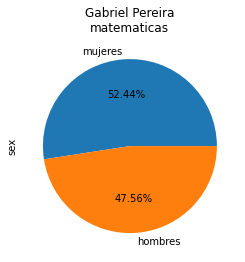

In [3]:
GRA_genDT(Gabriel_Pereira_matematicas,"Gabriel Pereira\nmatematicas")
plt.show()

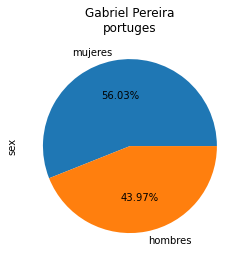

In [4]:
GRA_genDT(Gabriel_Pereira_portuges,"Gabriel Pereira\nportuges")
plt.show()

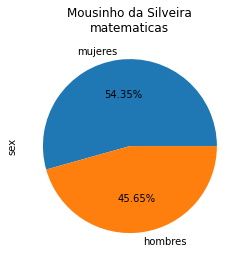

In [5]:
GRA_genDT(Mousinho_da_Silveira_matematicas,"Mousinho da Silveira\nmatematicas")
plt.show()

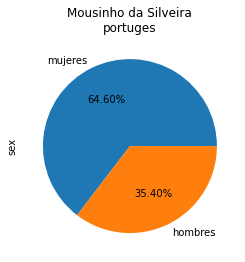

In [6]:
GRA_genDT(Mousinho_da_Silveira_portuges,"Mousinho da Silveira\nportuges")
plt.show()

# rango de edad

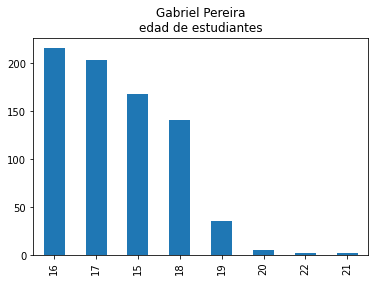

In [7]:
ran_edad(Gabriel_Pereira,'Gabriel Pereira\nedad de estudiantes')
plt.show()

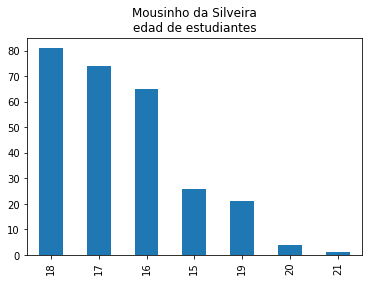

In [8]:
ran_edad(Mousinho_da_Silveira,'Mousinho da Silveira\nedad de estudiantes')       
plt.show()

# promedio de edades de cada curso por escuela

In [9]:
print('\tEscuela Gabriel Pereira\npromedio de edades por curso\n',prom_edad(Gabriel_Pereira_matematicas,Gabriel_Pereira_portuges))

	Escuela Gabriel Pereira
promedio de edades por curso
    matematicas   portuges
0     16.52149  16.666667


In [10]:
print('\tMousinho da Silveira\npromedio de edades por curso\n',prom_edad(Mousinho_da_Silveira_matematicas,Mousinho_da_Silveira_portuges))

	Mousinho da Silveira
promedio de edades por curso
    matematicas   portuges
0    18.021739  16.889381


# promedio de notas de cada curso por escuela

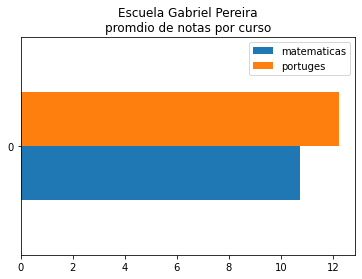

In [11]:
prom_notas(Gabriel_Pereira_matematicas,Gabriel_Pereira_portuges,'Escuela Gabriel Pereira\npromdio de notas por curso')
plt.show()

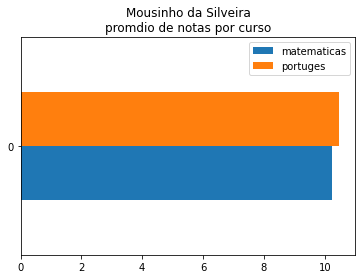

In [12]:
prom_notas(Mousinho_da_Silveira_matematicas,Mousinho_da_Silveira_portuges,'Mousinho da Silveira\npromdio de notas por curso')
plt.show()

# Ausencias 

In [13]:
print('valor maximo de ausencias= ',max_aus())

valor maximo de ausencias=  75


In [14]:
print('escuela Gabriel Pereira asistencias en matematica\n',asist(Gabriel_Pereira_matematicas))

escuela Gabriel Pereira asistencias en matematica
      asistencias
0             92
1             94
2             86
3             97
4             94
..           ...
344           94
345           90
346           88
347          100
348          100

[349 rows x 1 columns]


In [15]:
print('escuela Gabriel Pereira asistencias en matematica\n',asist(Gabriel_Pereira_portuges))

escuela Gabriel Pereira asistencias en matematica
      asistencias
0             94
1             97
2             92
3            100
4            100
..           ...
418           82
419           86
420           86
421           93
422           94

[423 rows x 1 columns]


In [16]:
print('escuela Gabriel Pereira asistencias en matematica\n',asist(Mousinho_da_Silveira_matematicas))

escuela Gabriel Pereira asistencias en matematica
     asistencias
0            86
1            89
2            97
3            90
4            94
5            94
6           100
7            94
8            97
9            94
10          100
11          100
12           97
13          100
14          100
15          100
16           94
17          100
18          100
19          100
20           86
21           94
22           96
23           89
24           81
25          100
26           97
27           94
28           94
29          100
30           77
31           94
32           93
33           97
34          100
35           81
36           97
37           90
38          100
39          100
40          100
41           85
42           96
43           96
44          100
45           93


In [17]:
print('escuela Gabriel Pereira asistencias en matematica\n',asist(Mousinho_da_Silveira_portuges))

escuela Gabriel Pereira asistencias en matematica
      asistencias
0             85
1            100
2             92
3             94
4            100
..           ...
221           94
222           94
223           92
224           92
225           94

[226 rows x 1 columns]


# columna 'extra' y 'aproved'

In [18]:
print('Escuela Gabriel Pereira\nlista con aprobados matematicas\n',Gabriel_Pereira_matematicasRE)

Escuela Gabriel Pereira
lista con aprobados matematicas
     school sex  age address Pstatus guardian  traveltime  studytime  failures  \
0       GP   F   18       U       A   mother           2          2         0   
1       GP   F   17       U       T   father           1          2         0   
2       GP   F   15       U       T   mother           1          2         3   
3       GP   F   15       U       T   mother           1          3         0   
4       GP   F   16       U       T   father           1          2         0   
..     ...  ..  ...     ...     ...      ...         ...        ...       ...   
344     GP   F   18       U       T   mother           1          3         0   
345     GP   F   18       U       T   mother           1          3         0   
346     GP   M   18       R       T   mother           1          3         0   
347     GP   M   18       U       T   mother           1          3         0   
348     GP   F   17       U       T   mother        

In [19]:
print('Escuela Gabriel Pereira\nlista con aprobados portuges\n',Gabriel_Pereira_portugesRE)

Escuela Gabriel Pereira
lista con aprobados portuges
     school sex  age address Pstatus guardian  traveltime  studytime  failures  \
0       GP   F   18       U       A   mother           2          2         0   
1       GP   F   17       U       T   father           1          2         0   
2       GP   F   15       U       T   mother           1          2         0   
3       GP   F   15       U       T   mother           1          3         0   
4       GP   F   16       U       T   father           1          2         0   
..     ...  ..  ...     ...     ...      ...         ...        ...       ...   
418     GP   M   18       R       T   father           1          1         0   
419     GP   M   19       U       T   mother           1          1         0   
420     GP   F   18       U       A   mother           2          2         0   
421     GP   F   20       U       T   mother           2          1         1   
422     GP   F   18       U       T   mother           

In [20]:
print('Escuela Mousinho da Silveira\nlista con aprobados matematicas\n',Mousinho_da_Silveira_matematicasRE.head())

Escuela Mousinho da Silveira
lista con aprobados matematicas
   school sex  age address Pstatus guardian  traveltime  studytime  failures  \
0     MS   M   18       R       T   mother           2          1         1   
1     MS   M   19       R       T    other           3          2         3   
2     MS   M   17       U       T   mother           2          2         0   
3     MS   M   18       U       T   mother           1          1         1   
4     MS   M   19       R       T    other           3          1         1   

  paid internet  health  absences  G1  G2  G3  extra  aproved  
0   no      yes       5        10  11  13  13      1        1  
1   no      yes       2         8   8   7   8      0        0  
2  yes      yes       3         2  13  13  13      1        1  
3   no      yes       3         7   8   7   8      0        0  
4   no      yes       5         4   8   8   8      0        0  


In [21]:
print('Escuela Mousinho da Silveira\nlista con aprobados portuges\n',Mousinho_da_Silveira_portugesRE)

Escuela Mousinho da Silveira
lista con aprobados portuges
     school sex  age address Pstatus guardian  traveltime  studytime  failures  \
0       MS   F   16       U       T   father           2          1         0   
1       MS   F   16       R       T   mother           2          2         0   
2       MS   F   15       R       T   mother           1          1         1   
3       MS   F   15       R       T   mother           2          1         0   
4       MS   F   16       R       T   mother           2          2         0   
..     ...  ..  ...     ...     ...      ...         ...        ...       ...   
221     MS   F   19       R       T   mother           1          3         1   
222     MS   F   18       U       T   mother           1          2         0   
223     MS   F   18       U       T   mother           2          2         0   
224     MS   M   17       U       T   mother           2          1         0   
225     MS   M   18       R       T   mother      

# porcentaje grafico de alumnos aprovados por curso

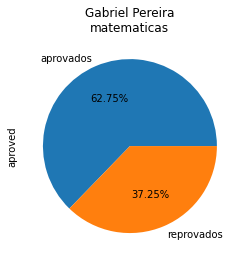

In [22]:
GRA_aprobados(Gabriel_Pereira_matematicasRE,"Gabriel Pereira\nmatematicas")       
plt.show()

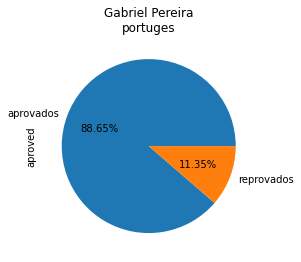

In [23]:
GRA_aprobados(Gabriel_Pereira_portugesRE,'Gabriel Pereira\nportuges')
plt.show()

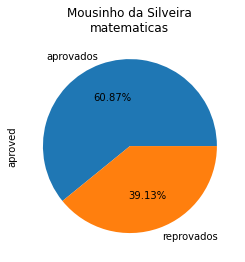

In [24]:
GRA_aprobados(Mousinho_da_Silveira_matematicasRE,'Mousinho da Silveira\nmatematicas')       
plt.show()

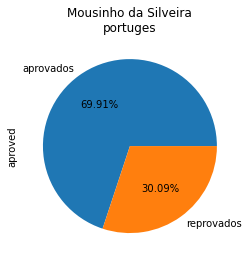

In [25]:
GRA_aprobados(Mousinho_da_Silveira_portugesRE,'Mousinho da Silveira\nportuges')
plt.show()

# Resultado

In [26]:
fecha=str(time.ctime())
fecha=fecha.replace(':','-').replace(' ','_')
Gabriel_Pereira_matematicasRE.to_csv(f'resultado-mate-GP {fecha}.csv',index=False)
Gabriel_Pereira_portugesRE.to_csv(f'resultado-por-GP {fecha}.csv',index=False)
Mousinho_da_Silveira_matematicasRE.to_csv(f'resultado-mat-MS {fecha}.csv',index=False)
Mousinho_da_Silveira_portugesRE.to_csv(f'resultado-por-MS {fecha}.csv',index=False)

In [27]:
with PdfPages('graficas de cursos de matematicas y portuges.pdf') as pdf:
    txt='graficas de cursos de matematicas y portuges'
    firstpage=plt.figure(figsize=(8.50,8.00))
    firstpage.clf()
    firstpage.text(0.5,0.5,txt,transform=firstpage.transFigure,size=24,ha='center')
    pdf.savefig()
    plt.close()
    
    GRA_genDT(Gabriel_Pereira_matematicas,"Gabriel Pereira\nmatematicas")
    pdf.savefig()
    plt.close()
    
    GRA_genDT(Gabriel_Pereira_portuges,"Gabriel Pereira\nportuges")
    pdf.savefig()
    plt.close()
    
    GRA_genDT(Mousinho_da_Silveira_matematicas,"Mousinho da Silveira\nmatematicas")
    pdf.savefig()
    plt.close()
    
    GRA_genDT(Mousinho_da_Silveira_portuges,"Mousinho da Silveira\nportuges")
    pdf.savefig()
    plt.close()
    
    ran_edad(Gabriel_Pereira,'Gabriel Pereira\nedad de estudiantes')
    pdf.savefig()
    plt.close()
    
    ran_edad(Mousinho_da_Silveira,'Mousinho da Silveira\nedad de estudiantes')
    pdf.savefig()
    plt.close()
    
    prom_notas(Gabriel_Pereira_matematicas,Gabriel_Pereira_portuges,'Escuela Gabriel Pereira\npromdio de notas por curso')
    pdf.savefig()
    plt.close()
    
    prom_notas(Mousinho_da_Silveira_matematicas,Mousinho_da_Silveira_portuges,'Mousinho da Silveira\npromdio de notas por curso')
    pdf.savefig()
    plt.close()
    
    GRA_aprobados(Gabriel_Pereira_matematicasRE,"Gabriel Pereira\nmatematicas")
    pdf.savefig()
    plt.close()
    
    GRA_aprobados(Gabriel_Pereira_portugesRE,'Gabriel Pereira\nportuges')
    pdf.savefig()
    plt.close()
    
    GRA_aprobados(Mousinho_da_Silveira_matematicasRE,'Mousinho da Silveira\nmatematicas')
    pdf.savefig()
    plt.close()
    
    GRA_aprobados(Mousinho_da_Silveira_portugesRE,'Mousinho da Silveira\nportuges')
    pdf.savefig()
    plt.close()
    
    